In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
means = np.mean(df.values, axis=0)
stds = np.std(df.values, axis=0)

print("Feature means:", means)
print("Feature standard deviations:", stds)

Feature means: [  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542   0.34895833]
Feature standard deviations: [  3.36738361  31.95179591  19.34320163  15.94182863 115.16894926
   7.87902573   0.33111282  11.75257265   0.47664076]


In [6]:
# Check for missing values with pandas
missing = df.isnull().sum()
print("Missing values:", missing)

Missing values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA components:", pca.explained_variance_ratio_)

# LDA (reduce to 1 dimension, since it's a binary classification)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
print("LDA coefficients:", lda.coef_)

PCA components: [0.26179749 0.21640127]
LDA coefficients: [[ 0.43691661  1.19192011 -0.28421338  0.01552145 -0.1310104   0.65751076
   0.3071881   0.19412227]]


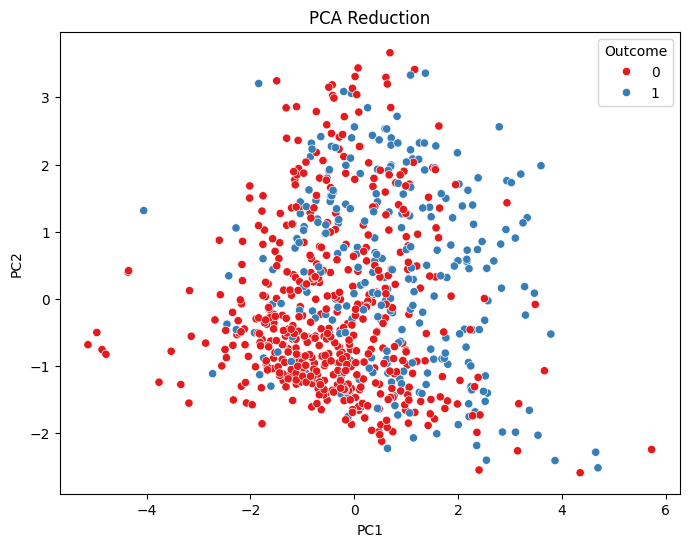

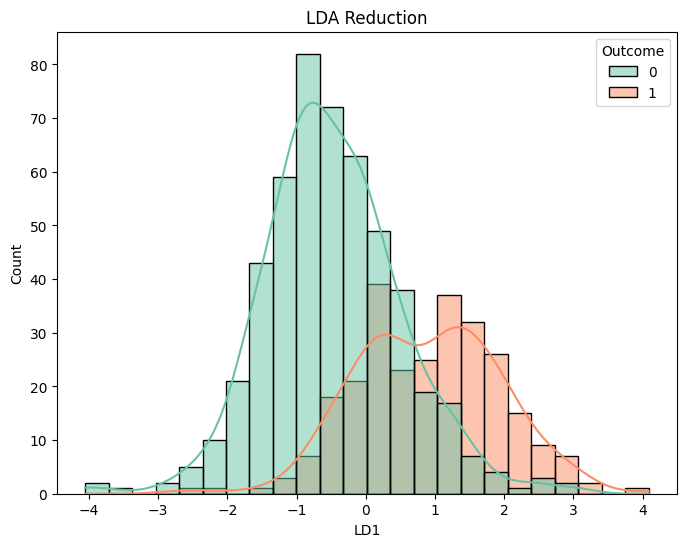

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA Reduction')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Display LDA (on one dimension)
plt.figure(figsize=(8, 6))
sns.histplot(x=X_lda.flatten(), hue=y, kde=True, palette='Set2')
plt.title('LDA Reduction')
plt.xlabel('LD1')
plt.show()

In [9]:
from PIL import Image
import numpy as np

# Load image (assume the file name is 'q2_image.jpg' - replace as needed)
img = Image.open('q2_image.jpg')
img_np = np.array(img)

# Extract color channels
red_channel = img_np[:, :, 0]    # Red channel
green_channel = img_np[:, :, 1]  # Green channel
blue_channel = img_np[:, :, 2]   # Blue channel

print("Color channels extracted")
print(f"Red channel shape: {red_channel.shape}")
print(f"Green channel shape: {green_channel.shape}")
print(f"Blue channel shape: {blue_channel.shape}")

Color channels extracted
Red channel shape: (1024, 1280)
Green channel shape: (1024, 1280)
Blue channel shape: (1024, 1280)


In [10]:
import numpy as np
import pandas as pd

# Create random arrays x, y, z with values from 0 to 10
x = np.random.randint(0, 11, size=5)
y = np.random.randint(0, 11, size=5)
z = np.random.randint(0, 11, size=5)

# Create a DataFrame from x, y, z
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

# Display the DataFrame
print(df)

    x  y   z
0   2  6   7
1  10  0   4
2   5  1  10
3   7  9   7
4   0  2   4


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
df = pd.read_csv('cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [13]:
# Drop 'Unnamed: 32' column if it exists, as it often contains all NaNs
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

# Drop 'id' column if it exists, as it's usually just an identifier and not a feature
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Preprocessing: Handle missing values (mean for numeric)
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Encode labels if categorical (assuming 'diagnosis' is the target)
if 'diagnosis' in df.columns:
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Separate features and target (assuming 'diagnosis' is target, adjust if needed)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Forward Selection with SVM
svm = SVC(kernel='linear', random_state=42)
sfs = SequentialFeatureSelector(svm, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(X_train, y_train)

# Selected features
selected_features = X.columns[sfs.get_support()]
print("Selected Features:", selected_features)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

Selected Features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'fractal_dimension_mean', 'texture_se',
       'smoothness_se', 'compactness_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [16]:
# Train SVM on selected features
svm.fit(X_train_sfs, y_train)
y_pred_sfs = svm.predict(X_test_sfs)

# Evaluate with selected features
acc_sfs = accuracy_score(y_test, y_pred_sfs)
prec_sfs = precision_score(y_test, y_pred_sfs)
rec_sfs = recall_score(y_test, y_pred_sfs)
f1_sfs = f1_score(y_test, y_pred_sfs)

print("\nWith Feature Selection:")
print(f"Accuracy: {acc_sfs:.4f}")
print(f"Precision: {prec_sfs:.4f}")
print(f"Recall: {rec_sfs:.4f}")
print(f"F1 Score: {f1_sfs:.4f}")


With Feature Selection:
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647


In [17]:
# Train SVM on all features for comparison
svm.fit(X_train, y_train)
y_pred_all = svm.predict(X_test)

# Evaluate without selection
acc_all = accuracy_score(y_test, y_pred_all)
prec_all = precision_score(y_test, y_pred_all)
rec_all = recall_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)

print("\nWithout Feature Selection:")
print(f"Accuracy: {acc_all:.4f}")
print(f"Precision: {prec_all:.4f}")
print(f"Recall: {rec_all:.4f}")
print(f"F1 Score: {f1_all:.4f}")


Without Feature Selection:
Accuracy: 0.9561
Precision: 0.9318
Recall: 0.9535
F1 Score: 0.9425


In [18]:
# Conclusion
if acc_sfs > acc_all:
    print("\nFeature selection improved performance by reducing noise and focusing on relevant features.")
else:
    print("\nFeature selection did not improve or slightly reduced performance, possibly due to loss of information.")


Feature selection improved performance by reducing noise and focusing on relevant features.
